In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
datas=pd.read_csv('Household Energy_Project_2.csv')
datas.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
0,4.22,0.42,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.36,0.44,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.37,0.50,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.39,0.50,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.67,0.53,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28


In [6]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Year                   int64  
 8   Month                  int64  
 9   Day                    int64  
 10  Hour                   int64  
 11  Minute                 int64  
dtypes: float64(7), int64(5)
memory usage: 190.0 MB


In [8]:
datas.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

In [20]:
#Check the Outliers using Skewness method and check column 'Global_active_power' greaterthan 0 or lessthan 0

print('Skewness:',datas['Global_active_power'].skew())

Skewness: 1.7975555991102574


In [22]:
#kurtosis method using predict the Outliers and check the Greaterthan 0 or Lessthan 0

print('Kurtosis:',datas['Global_active_power'].kurt())

Kurtosis: 4.310254944608014


In [7]:
#Outlier Treatment using IQR-(Inter Quantile Range)

Q1=datas['Global_active_power'].quantile(0.25)
Q2=datas['Global_active_power'].quantile(0.50)
Q3=datas['Global_active_power'].quantile(0.75)
IQR=Q3-Q1

In [9]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [11]:
#check the Condition lessthan Lower Limit 

datas[datas['Global_active_power']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute


In [13]:
#check the Condition Greaterthan Uper Limit

datas[datas['Global_active_power']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
0,4.22,0.42,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,5.36,0.44,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,5.37,0.50,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,5.39,0.50,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,3.67,0.53,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28
...,...,...,...,...,...,...,...,...,...,...,...,...
2074573,3.63,0.06,239.20,15.0,38.0,0.0,17.0,2010,11,26,9,37
2074574,3.62,0.06,238.92,15.0,37.0,0.0,18.0,2010,11,26,9,38
2074575,3.63,0.06,239.56,15.0,38.0,0.0,17.0,2010,11,26,9,39
2074576,3.55,0.06,239.84,14.8,38.0,0.0,18.0,2010,11,26,9,40


In [15]:
#Filter the condition LL and UL than Drop the Rows 

data=datas.drop(datas[(datas['Global_active_power']<LL) | (datas['Global_active_power']>UL)].index)

In [17]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
16,3.27,0.15,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40
18,3.27,0.00,237.13,13.8,0.0,0.0,18.0,2006,12,16,17,42
25,3.25,0.00,236.66,13.6,0.0,0.0,17.0,2006,12,16,17,49
26,3.24,0.00,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50
27,3.23,0.00,235.60,13.6,0.0,0.0,17.0,2006,12,16,17,51
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [19]:
#After check the Skewness Value

print('After Outlier Treatment Skewness Value:',data['Global_active_power'].skew())

After Outlier Treatment Skewness Value: 0.957312272142108


In [21]:
#After check the Kurtosis Value

print('After Outlier Treatment Kurtosis Value:',data['Global_active_power'].kurt())

After Outlier Treatment Kurtosis Value: 0.02491085873835175


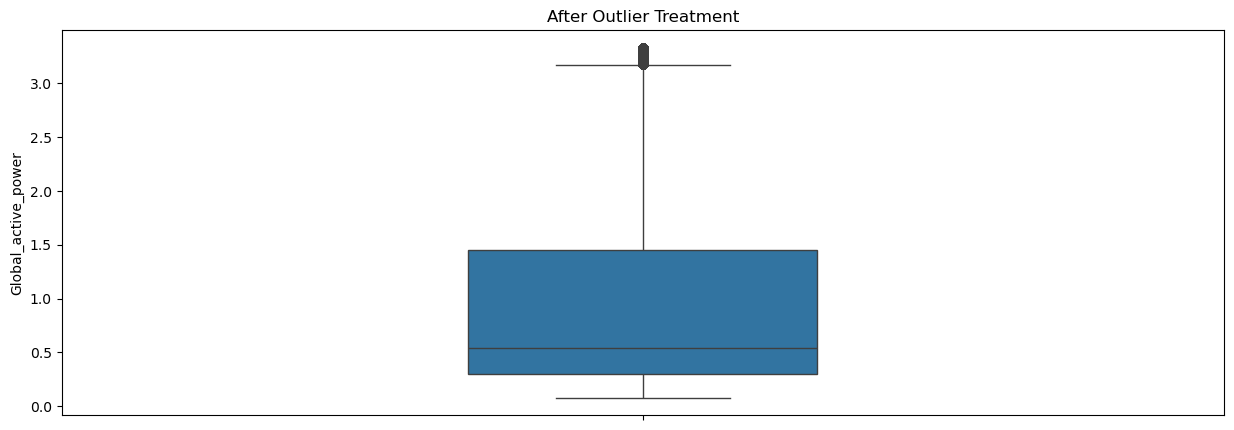

In [68]:
#After Outlier Treatment check the Boxplot

plt.figure(figsize=(15,5))
sns.boxplot(data['Global_active_power'],width=0.3)
plt.title('After Outlier Treatment')
plt.show()

In [23]:
#Check the Outliers using Skewness method and check column 'Global_reactive_power' greaterthan 0 or lessthan 0

print('Skewness:',data['Global_reactive_power'].skew())

Skewness: 1.2097348005537172


In [29]:
#kurtosis method using predict the Outliers and check column 'Global_reactive_power'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data['Global_reactive_power'].kurt())

Kurtosis: 2.446464460382068


In [33]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=data['Global_reactive_power'].quantile(0.25)
q2=data['Global_reactive_power'].quantile(0.50)
q3=data['Global_reactive_power'].quantile(0.75)
IQR=q3-q1

In [35]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [37]:
#check the Condition lessthan Lower Limit 

data[data['Global_reactive_power']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute


In [39]:
data[data['Global_reactive_power']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
1154,2.93,0.57,236.10,13.0,0.0,2.0,18.0,2006,12,17,12,38
1155,3.18,0.58,236.37,13.8,0.0,1.0,17.0,2006,12,17,12,39
1177,1.80,0.47,237.85,7.8,0.0,2.0,17.0,2006,12,17,13,1
1734,1.71,0.41,239.18,7.4,0.0,1.0,0.0,2006,12,17,22,18
1735,1.72,0.42,239.70,7.4,0.0,1.0,0.0,2006,12,17,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...
2074967,0.80,0.43,241.23,3.8,0.0,1.0,0.0,2010,11,26,16,11
2074968,0.93,0.43,241.44,4.2,0.0,1.0,0.0,2010,11,26,16,12
2075006,1.68,0.42,237.89,8.0,0.0,0.0,0.0,2010,11,26,16,50
2075007,2.02,0.41,237.44,9.6,0.0,0.0,0.0,2010,11,26,16,51


In [41]:
#Filter the condition LL and UL than Drop the Rows 

data1=data.drop(data[(data['Global_reactive_power']<LL) | (data['Global_reactive_power']>UL)].index)
data1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
16,3.27,0.15,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40
18,3.27,0.00,237.13,13.8,0.0,0.0,18.0,2006,12,16,17,42
25,3.25,0.00,236.66,13.6,0.0,0.0,17.0,2006,12,16,17,49
26,3.24,0.00,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50
27,3.23,0.00,235.60,13.6,0.0,0.0,17.0,2006,12,16,17,51
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [43]:
#After check the Skewness Value column 'Global_reactive_power'

print('After Outlier Treatment Skewness Value:',data1['Global_reactive_power'].skew())

After Outlier Treatment Skewness Value: 0.7011581126319215


In [45]:
#After check the Kurtosis Value column 'Global_reactive_power'

print('After Outlier Treatment Kurtosis Value:',data1['Global_reactive_power'].kurt())

After Outlier Treatment Kurtosis Value: -0.1530895135624779


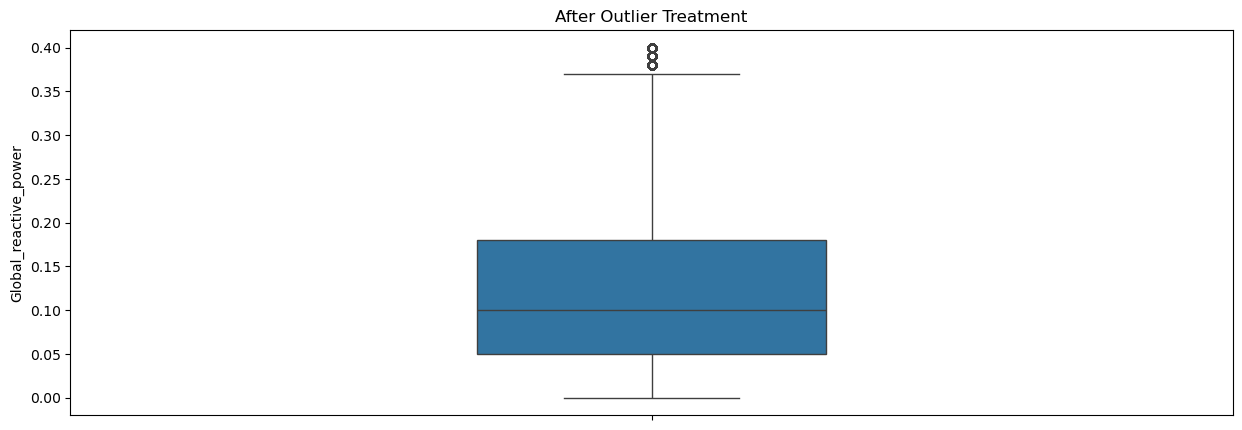

In [47]:
#After Outlier Treatment check the Boxplot column 'Global_reactive_power'

plt.figure(figsize=(15,5))
sns.boxplot(data1['Global_reactive_power'],width=0.3)
plt.title('After Outlier Treatment')
plt.show()

In [49]:
#Outlier Treatment column :'Voltage'
#Check the Outliers using Skewness method and check column 'Voltage' greaterthan 0 or lessthan 0

print('Skewness:',data1['Voltage'].skew())

Skewness: -0.2864724570846939


In [51]:
#kurtosis method using predict the Outliers and check column 'Voltage'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data1['Voltage'].kurt())

Kurtosis: 0.8538990180886645


In [55]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=data1['Voltage'].quantile(0.25)
q2=data1['Voltage'].quantile(0.50)
q3=data1['Voltage'].quantile(0.75)
IQR=q3-q1

In [57]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [59]:
#check the Condition lessthan Lower Limit 

data1[data1['Voltage']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
87,2.34,0.07,233.51,10.0,0.0,1.0,16.0,2006,12,16,18,51
88,2.32,0.00,233.44,9.8,0.0,0.0,17.0,2006,12,16,18,52
89,2.45,0.00,233.64,10.6,0.0,1.0,17.0,2006,12,16,18,53
120,3.26,0.05,232.64,14.0,0.0,0.0,17.0,2006,12,16,19,24
131,3.28,0.00,232.45,14.0,0.0,2.0,16.0,2006,12,16,19,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2073685,2.93,0.07,232.96,12.6,0.0,0.0,16.0,2010,11,25,18,49
2073686,2.93,0.06,232.98,12.6,0.0,0.0,17.0,2010,11,25,18,50
2073688,3.00,0.12,233.35,12.8,0.0,0.0,17.0,2010,11,25,18,52
2073689,3.00,0.16,233.10,12.8,0.0,0.0,16.0,2010,11,25,18,53


In [63]:
data1[data1['Voltage']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
528,0.31,0.13,248.48,1.4,0.0,1.0,0.0,2006,12,17,2,12
553,0.21,0.00,248.94,0.8,0.0,0.0,0.0,2006,12,17,2,37
558,0.22,0.00,249.37,1.0,0.0,0.0,0.0,2006,12,17,2,42
559,0.66,0.00,249.07,4.4,0.0,1.0,0.0,2006,12,17,2,43
2014,0.21,0.00,248.48,0.8,0.0,0.0,0.0,2006,12,18,2,58
...,...,...,...,...,...,...,...,...,...,...,...,...
2045139,0.65,0.05,248.50,2.6,0.0,0.0,1.0,2010,11,5,23,3
2068257,0.31,0.10,248.91,1.2,0.0,2.0,0.0,2010,11,22,0,21
2068258,0.31,0.10,249.10,1.2,0.0,1.0,0.0,2010,11,22,0,22
2068259,0.31,0.10,248.70,1.2,0.0,1.0,0.0,2010,11,22,0,23


In [65]:
#Filter the condition LL and UL than Drop the Rows 

data2=data1.drop(data1[(data1['Voltage']<LL) | (data1['Voltage']>UL)].index)
data2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
16,3.27,0.15,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40
18,3.27,0.00,237.13,13.8,0.0,0.0,18.0,2006,12,16,17,42
25,3.25,0.00,236.66,13.6,0.0,0.0,17.0,2006,12,16,17,49
26,3.24,0.00,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50
27,3.23,0.00,235.60,13.6,0.0,0.0,17.0,2006,12,16,17,51
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [67]:
#After check the Skewness Value column 'Voltage' 

print('After Outlier Treatment Skewness Value:',data2['Voltage'].skew())

After Outlier Treatment Skewness Value: -0.07707695085436836


In [69]:
#After check the Kurtosis Value column 'Voltage'

print('After Outlier Treatment Kurtosis Value:',data2['Voltage'].kurt())

After Outlier Treatment Kurtosis Value: -0.09023252831089801


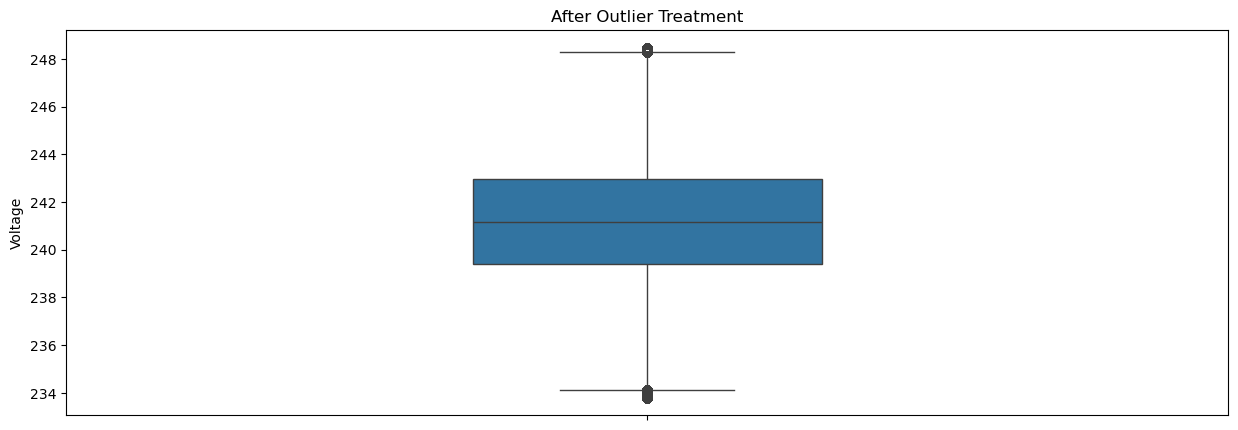

In [71]:
#After Outlier Treatment check the Boxplot column 'Voltage'

plt.figure(figsize=(15,5))
sns.boxplot(data2['Voltage'],width=0.3)
plt.title('After Outlier Treatment')
plt.show()

In [73]:
#Outlier Treatment column :'Global_intensity'
#Check the Outliers using Skewness method and check column 'Global_intensity' greaterthan 0 or lessthan 0

print('Skewness:',data2['Global_intensity'].skew())

Skewness: 1.008659622395068


In [75]:
#kurtosis method using predict the Outliers and check column 'Global_intensity'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data2['Global_intensity'].kurt())

Kurtosis: 0.21737662373329103


In [77]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=data2['Global_intensity'].quantile(0.25)
q2=data2['Global_intensity'].quantile(0.50)
q3=data2['Global_intensity'].quantile(0.75)
IQR=q3-q1

In [79]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [81]:
#check the Condition lessthan Lower Limit 

data2[data2['Global_intensity']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute


In [83]:
#check the Condition greaterthan Uper Limit 

data2[data2['Global_intensity']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
16,3.27,0.15,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40
18,3.27,0.00,237.13,13.8,0.0,0.0,18.0,2006,12,16,17,42
25,3.25,0.00,236.66,13.6,0.0,0.0,17.0,2006,12,16,17,49
26,3.24,0.00,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50
27,3.23,0.00,235.60,13.6,0.0,0.0,17.0,2006,12,16,17,51
...,...,...,...,...,...,...,...,...,...,...,...,...
2073707,3.08,0.18,236.37,13.0,0.0,0.0,17.0,2010,11,25,19,11
2073708,3.07,0.18,236.17,13.0,0.0,0.0,17.0,2010,11,25,19,12
2073709,3.06,0.18,235.59,13.0,0.0,0.0,17.0,2010,11,25,19,13
2073721,3.11,0.10,238.13,13.0,0.0,0.0,17.0,2010,11,25,19,25


In [85]:
#Filter the condition LL and UL than Drop the Rows 

data3=data2.drop(data2[(data2['Global_intensity']<LL) | (data2['Global_intensity']>UL)].index)
data3

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [87]:
#After check the Skewness Value column 'Global_intensity' 

print('After Outlier Treatment Skewness Value:',data3['Global_intensity'].skew())

After Outlier Treatment Skewness Value: 0.927476612962926


In [89]:
#After check the Kurtosis Value column 'Voltage'

print('After Outlier Treatment Kurtosis Value:',data3['Global_intensity'].kurt())

After Outlier Treatment Kurtosis Value: -0.07718773816918922


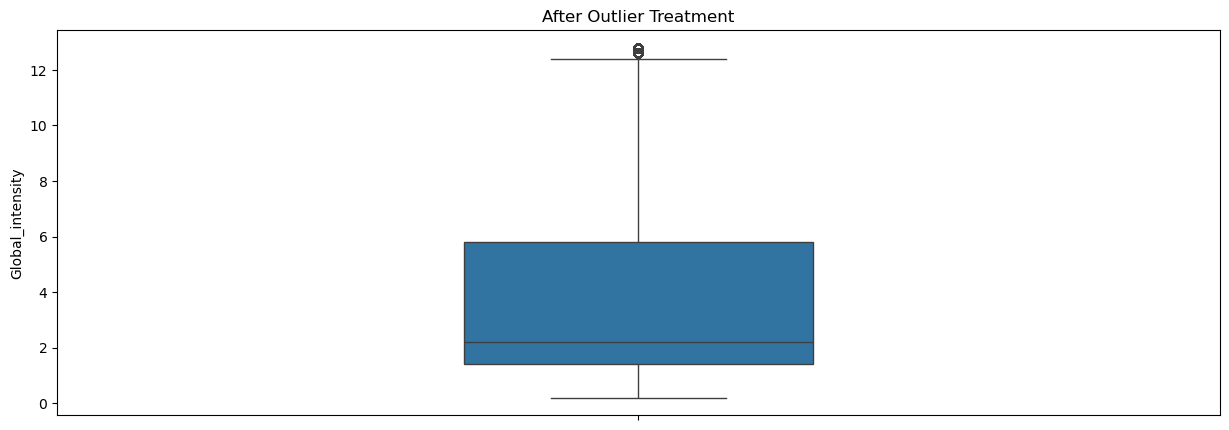

In [91]:
#After Outlier Treatment check the Boxplot column 'Global_intensity'

plt.figure(figsize=(15,5))
sns.boxplot(data3['Global_intensity'],width=0.3)
plt.title('After Outlier Treatment')
plt.show()

In [93]:
#Outlier Treatment column :'Sub_metering_1'
#Check the Outliers using Skewness method and check column 'Sub_metering_1' greaterthan 0 or lessthan 0

print('Skewness:',data3['Sub_metering_1'].skew())

Skewness: 13.041904247987192


In [95]:
#kurtosis method using predict the Outliers and check column 'Sub_metering_1'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data3['Sub_metering_1'].kurt())

Kurtosis: 175.49069022794262


In [97]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=data3['Sub_metering_1'].quantile(0.25)
q2=data3['Sub_metering_1'].quantile(0.50)
q3=data3['Sub_metering_1'].quantile(0.75)
IQR=q3-q1

In [99]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [101]:
#check the Condition lessthan Lower Limit 

data3[data3['Sub_metering_1']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute


In [103]:
#check the Condition greaterthan Uper Limit 

data3[data3['Sub_metering_1']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
1019,2.24,0.16,237.33,10.0,1.0,7.0,17.0,2006,12,17,10,23
1046,2.71,0.26,234.81,11.8,2.0,21.0,16.0,2006,12,17,10,50
1049,3.02,0.29,237.04,12.8,1.0,25.0,17.0,2006,12,17,10,53
1050,3.00,0.22,237.17,12.8,1.0,26.0,18.0,2006,12,17,10,54
1057,2.39,0.25,235.94,10.2,2.0,17.0,17.0,2006,12,17,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2074562,1.47,0.14,240.24,6.2,1.0,0.0,17.0,2010,11,26,9,26
2074563,1.51,0.21,241.25,6.2,1.0,0.0,18.0,2010,11,26,9,27
2074564,1.72,0.19,240.05,7.6,1.0,0.0,18.0,2010,11,26,9,28
2074578,1.77,0.05,241.40,8.2,11.0,0.0,17.0,2010,11,26,9,42


In [105]:
#Filter the condition LL and UL than Drop the Rows 

data4=data3.drop(data3[(data3['Sub_metering_1']<LL) | (data3['Sub_metering_1']>UL)].index)
data4

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [107]:
#After check the Skewness Value column 'Global_intensity' 

print('After Outlier Treatment Skewness Value:',data4['Sub_metering_1'].skew())

After Outlier Treatment Skewness Value: 0.0


In [109]:
#kurtosis method using predict the Outliers and check column 'Sub_metering_1'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data4['Sub_metering_1'].kurt())

Kurtosis: 0.0


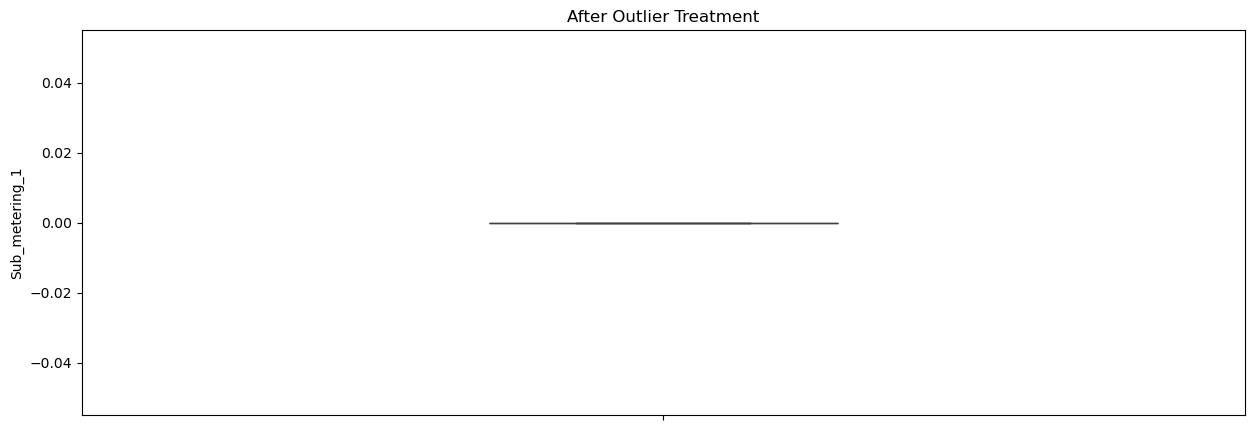

In [111]:
#After Outlier Treatment check the Boxplot column 'Global_intensity'

plt.figure(figsize=(15,5))
sns.boxplot(data4['Sub_metering_1'],width=0.3)
plt.title('After Outlier Treatment')
plt.show()

In [113]:
#Outlier Treatment column :'Sub_metering_2'
#Check the Outliers using Skewness method and check column 'Sub_metering_2' greaterthan 0 or lessthan 0

print('Skewness:',data4['Sub_metering_2'].skew())

Skewness: 10.359289924886037


In [115]:
#kurtosis method using predict the Outliers and check column 'Sub_metering_2'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data4['Sub_metering_2'].kurt())

Kurtosis: 118.98495566572954


In [117]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=data4['Sub_metering_2'].quantile(0.25)
q2=data4['Sub_metering_2'].quantile(0.50)
q3=data4['Sub_metering_2'].quantile(0.75)
IQR=q3-q1

In [119]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [121]:
#check the Condition lessthan lower Limit

data4[data4['Sub_metering_2']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute


In [123]:
#check the Condition greaterthan Uper Limit 

data4[data4['Sub_metering_2']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
85,2.54,0.09,234.67,10.8,0.0,4.0,17.0,2006,12,16,18,49
86,2.50,0.08,233.92,10.6,0.0,3.0,17.0,2006,12,16,18,50
462,2.36,0.10,241.35,10.4,0.0,28.0,0.0,2006,12,17,1,6
473,2.82,0.19,239.55,11.8,0.0,36.0,0.0,2006,12,17,1,17
479,1.76,0.05,241.18,7.6,0.0,24.0,0.0,2006,12,17,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
2072184,0.78,0.00,237.67,3.2,0.0,4.0,0.0,2010,11,24,17,48
2072185,0.74,0.00,239.43,3.0,0.0,3.0,0.0,2010,11,24,17,49
2072186,0.86,0.08,239.46,3.6,0.0,4.0,0.0,2010,11,24,17,50
2072187,0.82,0.08,239.11,3.4,0.0,3.0,0.0,2010,11,24,17,51


In [125]:
#Filter the condition LL and UL than Drop the Rows 

data5=data4.drop(data4[(data4['Sub_metering_2']<LL) | (data4['Sub_metering_2']>UL)].index)
data5

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1


In [129]:
#After check the Skewness Value column 'Sub_metering_2' 

print('After Outlier Treatment Skewness Value:',data5['Sub_metering_2'].skew())

After Outlier Treatment Skewness Value: 1.60587222310657


In [131]:
#kurtosis method using predict the Outliers and check column 'Sub_metering_2'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data5['Sub_metering_2'].kurt())

Kurtosis: 1.3535814772153132


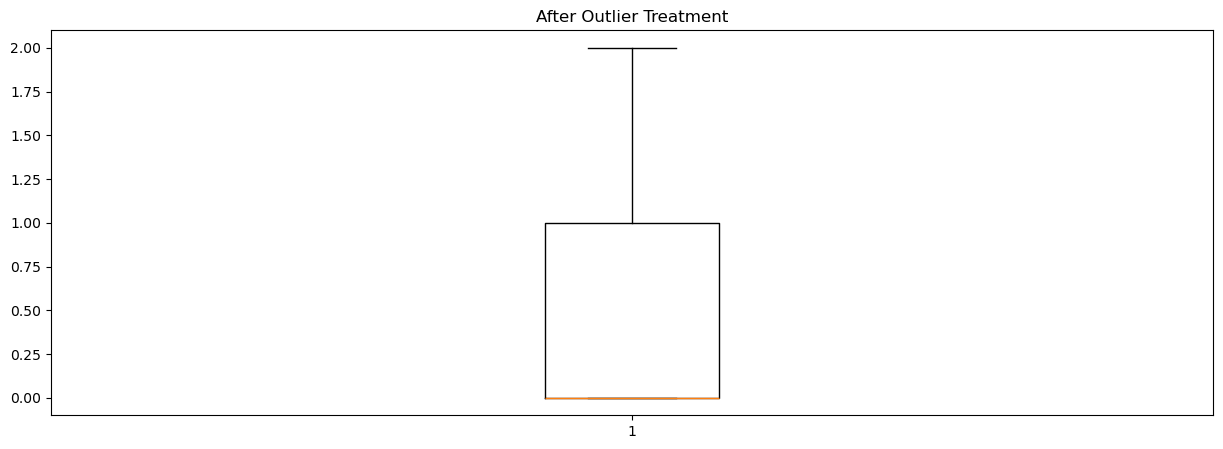

In [182]:
#After Outlier Treatment check the Boxplot column 'Global_intensity'

plt.figure(figsize=(15,5))
plt.boxplot(data5['Sub_metering_2'])
plt.title('After Outlier Treatment')
plt.show()

In [147]:
#Outlier Treatment column :'Sub_metering_3'
#Check the Outliers using Skewness method and check column 'Sub_metering_3' greaterthan 0 or lessthan 0

print('Skewness:',data5['Sub_metering_3'].skew())

Skewness: 0.9633442303542045


In [149]:
#kurtosis method using predict the Outliers and check column 'Sub_metering_2'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',data5['Sub_metering_3'].kurt())

Kurtosis: -0.890070219004353


In [ ]:
#No Outliers for this columns 

In [160]:
# Create rolling averages for smoothing

data5['Rolling_Avg_Power'] = data5['Global_active_power'].rolling(window=10).mean()

In [166]:
data5

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,NaN
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,NaN
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,NaN
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,NaN
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0.980
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0.979
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0.953
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1,0.944


In [168]:
# Create rolling averages for smoothing

data5['Rolling_Avg_Power'].round(2)


In [174]:
data5.round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,NaN
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,NaN
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,NaN
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,NaN
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0.98
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0.98
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0.95
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1,0.94


In [176]:
#missing value apply mean value

data5['Rolling_Avg_Power'].fillna(data5['Rolling_Avg_Power'].mean(),inplace=True)

C:\Users\vnave\AppData\Local\Temp\ipykernel_2364\479817077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data5['Rolling_Avg_Power'].fillna(data5['Rolling_Avg_Power'].mean(),inplace=True)


In [180]:
data5.round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
30,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,0.83
35,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,0.83
36,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,0.83
37,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,0.83
38,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0.98
2075255,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0.98
2075256,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0.95
2075257,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1,0.94


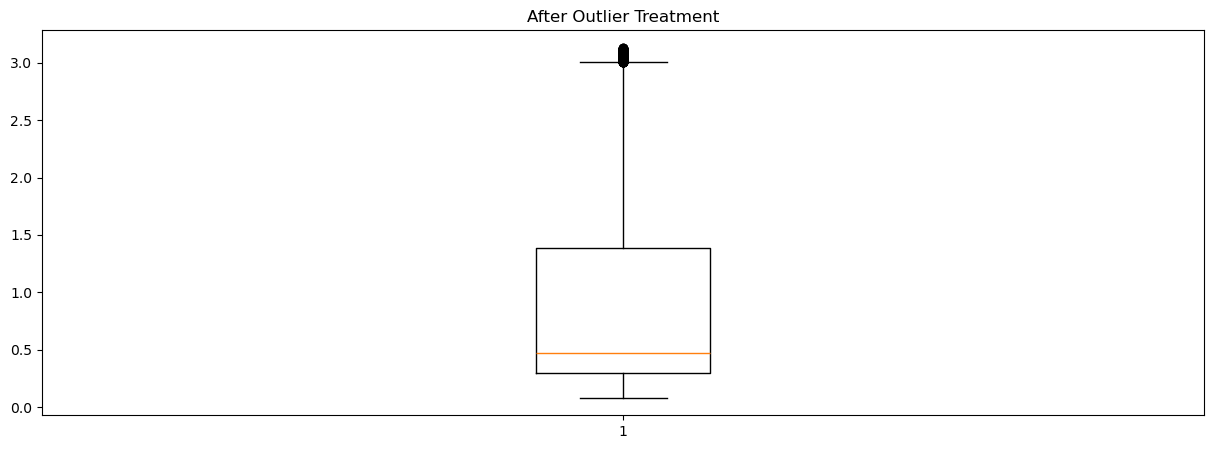

In [184]:
#After Outlier Treatment check the Boxplot column 'Global_intensity'

plt.figure(figsize=(15,5))
plt.boxplot(data5['Rolling_Avg_Power'])
plt.title('After Outlier Treatment')
plt.show()

In [ ]:
data5.to_csv('Household Energy_Project_3.csv',index=False)

In [3]:
house=pd.read_csv('Household Energy_Project_3.csv')
house

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
0,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,0.825782
1,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,0.825782
2,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,0.825782
3,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,0.825782
4,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,0.825782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714786,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0.980000
1714787,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0.979000
1714788,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0.953000
1714789,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1,0.944000


In [5]:
houses=house.round(2)

In [7]:
houses.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
0,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,0.83
1,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,0.83
2,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,0.83
3,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,0.83
4,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,0.83


In [14]:
#Outlier Treatment column :'Rolling_Avg_Power'
#Check the Outliers using Skewness method and check column 'Rolling_Avg_Power' greaterthan 0 or lessthan 0

print('Skewness:',houses['Rolling_Avg_Power'].skew())

Skewness: 0.9659698274818715


In [19]:
#kurtosis method using predict the Outliers and check column 'Rolling_Avg_Power'  Greaterthan 0 or Lessthan 0

print('Kurtosis:',houses['Rolling_Avg_Power'].kurt())

Kurtosis: -0.09788396000703736


In [21]:
#Outlier Treatment using IQR-(Inter Quantile Range)

q1=houses['Rolling_Avg_Power'].quantile(0.25)
q2=houses['Rolling_Avg_Power'].quantile(0.50)
q3=houses['Rolling_Avg_Power'].quantile(0.75)
IQR=q3-q1

In [23]:
UL=q3+1.5*IQR
LL=q1-1.5*IQR

In [25]:
#check the Condition lessthan lower Limit

houses[houses['Rolling_Avg_Power']<LL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power


In [27]:
#check the Condition greaterthan Uper Limit 

houses[houses['Rolling_Avg_Power']>UL]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
910,3.10,0.28,239.79,12.8,0.0,2.0,17.0,2006,12,17,21,30,3.01
911,3.09,0.28,239.71,12.8,0.0,1.0,17.0,2006,12,17,21,32,3.05
912,3.10,0.28,240.01,12.8,0.0,1.0,18.0,2006,12,17,21,33,3.06
913,3.11,0.31,241.40,12.8,0.0,1.0,17.0,2006,12,17,21,36,3.07
914,3.00,0.38,238.59,12.6,0.0,1.0,17.0,2006,12,17,21,44,3.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713406,3.01,0.05,236.91,12.6,0.0,0.0,17.0,2010,11,25,19,20,3.00
1713407,3.00,0.05,236.59,12.6,0.0,0.0,17.0,2010,11,25,19,21,3.00
1713408,3.02,0.05,237.55,12.6,0.0,0.0,17.0,2010,11,25,19,22,3.01
1713409,3.04,0.06,238.38,12.6,0.0,0.0,18.0,2010,11,25,19,23,3.01


In [29]:
#Filter the condition LL and UL than Drop the Rows 

energy=houses.drop(houses[(houses['Rolling_Avg_Power']<LL) | (houses['Rolling_Avg_Power']>UL)].index)
energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Rolling_Avg_Power
0,2.72,0.00,235.06,11.6,0.0,0.0,17.0,2006,12,16,17,54,0.83
1,2.47,0.06,236.94,10.4,0.0,0.0,17.0,2006,12,16,17,59,0.83
2,2.79,0.18,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,0.83
3,2.62,0.14,238.20,11.0,0.0,0.0,17.0,2006,12,16,18,1,0.83
4,2.77,0.12,238.28,11.6,0.0,0.0,17.0,2006,12,16,18,2,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714786,0.95,0.00,240.43,4.0,0.0,0.0,0.0,2010,11,26,20,58,0.98
1714787,0.94,0.00,240.00,4.0,0.0,0.0,0.0,2010,11,26,20,59,0.98
1714788,0.94,0.00,239.82,3.8,0.0,0.0,0.0,2010,11,26,21,0,0.95
1714789,0.93,0.00,239.70,3.8,0.0,0.0,0.0,2010,11,26,21,1,0.94


In [31]:
#After check the Skewness Value column 'Sub_metering_2' 

print('After Outlier Treatment Skewness Value:',energy['Rolling_Avg_Power'].skew())

After Outlier Treatment Skewness Value: 0.9601028001882286


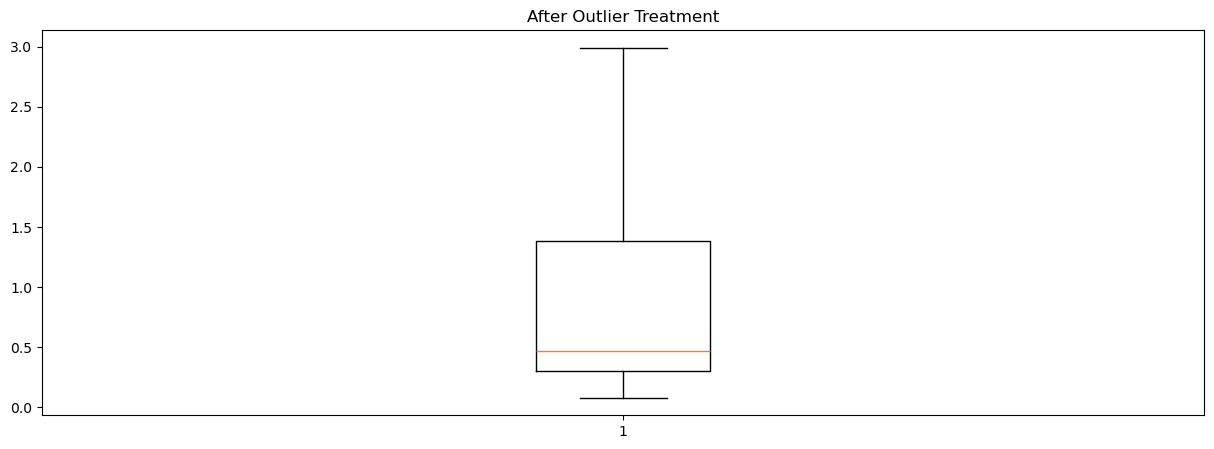

In [33]:
#After Outlier Treatment check the Boxplot column 'Global_intensity'

plt.figure(figsize=(15,5))
plt.boxplot(energy['Rolling_Avg_Power'])
plt.title('After Outlier Treatment')
plt.show()

In [37]:
energy.to_csv('Household Energy Usage Forecast_Project_4.csv')